In [25]:
from pathlib import Path
import os
import numpy as np
import pandas as pd

import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import nibabel
import json

from nilearn import plotting, image
from nilearn.glm.first_level import FirstLevelModel
from nilearn.reporting import make_glm_report
from nilearn.plotting import plot_design_matrix
from nilearn.plotting import plot_contrast_matrix
from nilearn.plotting import plot_event
from nilearn.glm.first_level import make_first_level_design_matrix

In [2]:
# Define the list of task fMRI files for a given subject across the three runs 
#
subject_id = 'sub-45TDGV'
folder_in = f"/project/6019337/databases/religion/bids/preprocessed_23.1.3/{subject_id}/ses-1/func/"
fmri_imgs = []

for run_id in range(1, 4):
    fmri_file = os.path.join(
        folder_in, 
        f"{subject_id}_ses-1_task-image_run-{run_id}_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
    )
    fmri_imgs.append(fmri_file)

# Print the list of fMRI files
print(fmri_imgs)

# Check if all fMRI files exist
all_exist = all(os.path.exists(f) for f in fmri_imgs)

# Print the result
if all_exist:
    print("All files exist.")
else:
    print("Some files do not exist.")

# Print detailed information about missing fMRI files
for f in fmri_imgs:
    if not os.path.exists(f):
        print(f"File does not exist: {f}")

['/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']
All files exist.


In [4]:
# Define the list of fMRI-related event files for a given subject across the three runs 
#
subject_id = 'sub-45TDGV'
folder_in = f"/project/6019337/databases/religion/bids/main/{subject_id}/ses-1/func/"
event_files = []

for run_id in range(1, 4):
    event_file = os.path.join(
        folder_in, 
        f"{subject_id}_ses-1_task-image_run-{run_id}_events.tsv"
    )
    event_files.append(event_file)

# Print the list of event files
print(event_files)

# Check if all event files exist
all_exist = all(os.path.exists(f) for f in event_files)

# Print the result
if all_exist:
    print("All files exist.")
else:
    print("Some files do not exist.")

# Print detailed information about missing event files
for f in event_files:
    if not os.path.exists(f):
        print(f"File does not exist: {f}")

['/project/6019337/databases/religion/bids/main/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-1_events.tsv', '/project/6019337/databases/religion/bids/main/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-2_events.tsv', '/project/6019337/databases/religion/bids/main/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-3_events.tsv']
All files exist.


In [5]:
# Read each design matrix from a CSV file with tab separation
event_matrices = [pd.read_csv(df, sep='\t') for df in event_files]

# Function to set duration, in seconds, based on trial type (question, image, response)
def set_duration(trial_type):
    if trial_type.startswith('question:'):
        return 1.0
    elif trial_type.startswith('image:'):
        return 1.0
    elif trial_type.startswith('response:'):
        return 0.0
    else:
        return 0  # Default value if none of the conditions match

# Apply the function to the 'trial_type' column to set the 'duration' values for each design matrix
for i, event_matrix in enumerate(event_matrices):
    event_matrix['duration'] = event_matrix['trial_type'].apply(set_duration)

# Check the event matrices
for i, event_matrix in enumerate(event_matrices):
    print(f"Updated Event Matrix for Run {i+1}:")
    print(event_matrix.head(), "\n")

Updated Event Matrix for Run 1:
       onset  duration         trial_type
0   0.000000       1.0      question:mind
1   0.000000       1.0        image:human
2   0.000000       0.0         response:1
3  13.542082       1.0  question:morality
4  13.559829       1.0         image:inan 

Updated Event Matrix for Run 2:
      onset  duration         trial_type
0  0.000000       1.0  question:morality
1  0.000000       1.0         image:inan
2  0.000000       0.0         response:1
3  8.522844       1.0      question:mind
4  8.572855       1.0          image:god 

Updated Event Matrix for Run 3:
      onset  duration         trial_type
0  0.000000       1.0  question:morality
1  0.000000       1.0        image:super
2  0.000000       0.0         response:1
3  8.522782       1.0      question:mind
4  8.556241       1.0          image:god 



In [7]:
# Define the list of fMRI-related JSON files for a given subject across the three runs 
#
subject_id = 'sub-45TDGV'
folder_in = f"/project/6019337/databases/religion/bids/preprocessed_23.1.3/{subject_id}/ses-1/func/"
json_files = []

for run_id in range(1, 4):
    json_file = os.path.join(
        folder_in, 
        f"{subject_id}_ses-1_task-image_run-{run_id}_space-MNI152NLin2009cAsym_desc-preproc_bold.json"
    )
    json_files.append(json_file)

# Print the list of fMRI files
print(json_files)

# Check if all fMRI files exist
all_exist = all(os.path.exists(f) for f in json_files)

# Print the result
if all_exist:
    print("All files exist.")
else:
    print("Some files do not exist.")

# Print detailed information about missing fMRI files
for f in json_files:
    if not os.path.exists(f):
        print(f"File does not exist: {f}")

['/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.json', '/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.json', '/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.json']
All files exist.


In [10]:
# Create a list to store design matrices for each run
design_matrices = []

# Loop over the fMRI runs
for run_id in range(1, 4):
    # Load the NIFTI file
    img = image.load_img(fmri_imgs[run_id - 1])

    # The number of frames (or volumes) is the last dimension of the shape
    n_scans = img.shape[-1]

    # Define the repetition time (TR) of the fMRI data - from corresponding JSON 
    with open(json_files[run_id - 1], 'r') as f:
        params = json.load(f)

    # Get the value for the field 'RepetitionTime'
    # and define repetition time (t_r), in seconds
    t_r = params.get('RepetitionTime')

    frame_times = (
        np.arange(n_scans) * t_r
    )  # here are are the corresponding frame times
  
    print(f"The repetition time is: {t_r}")

    # Get the events from the event matrix 
    events = event_matrices[run_id - 1]
    print(event_matrix.head(), "\n")
    
    # Create the design matrix
    design_matrix = make_first_level_design_matrix(
        frame_times=frame_times,
        events=events,
        hrf_model='glover',
        drift_model='polynomial',
        high_pass=0.01,
        drift_order=3,
    )
    # design_matrix = make_first_level_design_matrix(frame_times, events, hrf_model='spm')
    design_matrices.append(design_matrix)

    print(f"The number of frames in the fMRI NIFTI file {fmri_imgs[run_id - 1]} is: {n_scans}")

The repetition time is: 1.66
      onset  duration         trial_type
0  0.000000       1.0  question:morality
1  0.000000       1.0        image:super
2  0.000000       0.0         response:1
3  8.522782       1.0      question:mind
4  8.556241       1.0          image:god 

The number of frames in the fMRI NIFTI file /project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz is: 360


/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:3, response:4, response:2.
  warnings.warn(


The repetition time is: 1.66
      onset  duration         trial_type
0  0.000000       1.0  question:morality
1  0.000000       1.0        image:super
2  0.000000       0.0         response:1
3  8.522782       1.0      question:mind
4  8.556241       1.0          image:god 

The number of frames in the fMRI NIFTI file /project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz is: 360


/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:4, response:2, response:3.
  warnings.warn(


The repetition time is: 1.66
      onset  duration         trial_type
0  0.000000       1.0  question:morality
1  0.000000       1.0        image:super
2  0.000000       0.0         response:1
3  8.522782       1.0      question:mind
4  8.556241       1.0          image:god 

The number of frames in the fMRI NIFTI file /project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz is: 360


/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:4, response:3, response:2.
  warnings.warn(


/tmp/ipykernel_2697493/2165553245.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


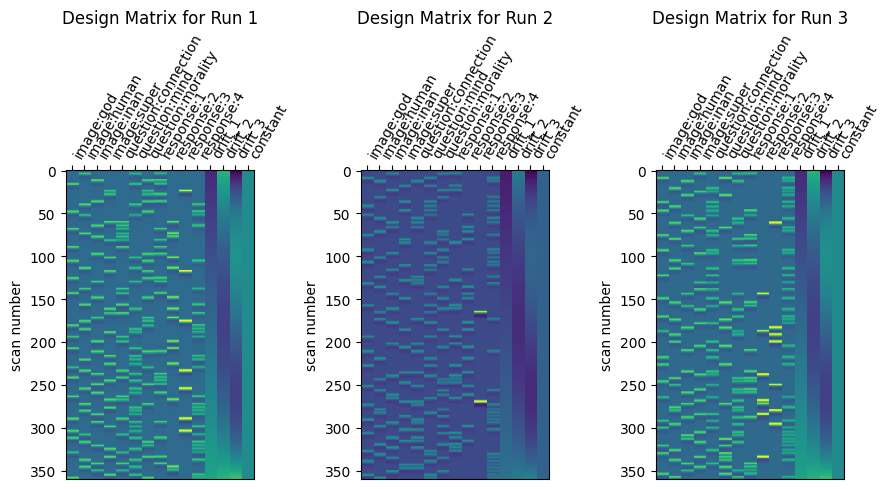

In [22]:
# Visualzie the design matrices for three runs
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))

for run_id, design_matrix in enumerate(design_matrices, start=1):
    ax = axes[run_id - 1]  # Select the appropriate subplot
    plot_design_matrix(design_matrix, ax=ax)
    ax.set_title(f'Design Matrix for Run {run_id}')

plt.tight_layout()
plt.show()

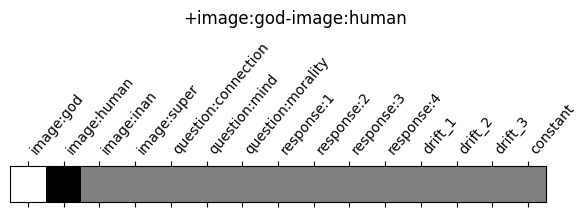

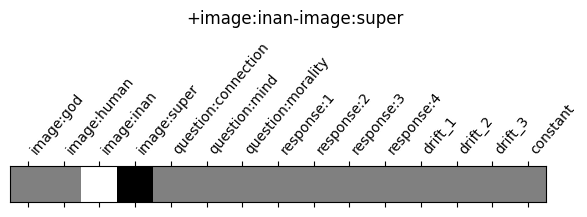

In [26]:
# Define and visualize the contrasts 
def make_localizer_contrasts(design_matrix):
    """Return a dictionary of two contrasts, given the design matrix."""
    # first generate canonical contrasts
    contrast_matrix = np.eye(design_matrix.shape[1])
    contrasts = {
        column: contrast_matrix[i]
        for i, column in enumerate(design_matrix.columns)
    }

    # Short dictionary of more relevant contrasts
    contrasts = {
        "+image:god-image:human": (
            contrasts["image:god"]
            - contrasts["image:human"]
        ),
        "+image:inan-image:super": (
            contrasts["image:inan"]
            - contrasts["image:super"]
        )
    }
    return contrasts

design_matrix = design_matrices[0]
contrasts = make_localizer_contrasts(design_matrix)

for key, values in contrasts.items():
    plot_contrast_matrix(values, design_matrix=design_matrix)
    plt.suptitle(key)

plt.show()

/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:3, response:4, response:2.
  warnings.warn(


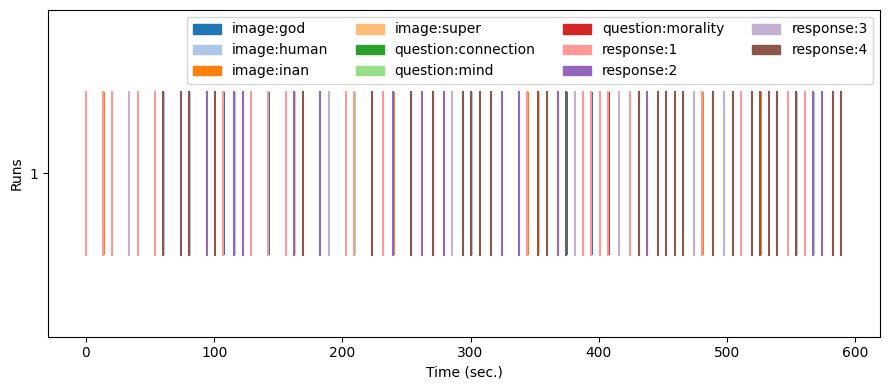

/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:4, response:2, response:3.
  warnings.warn(


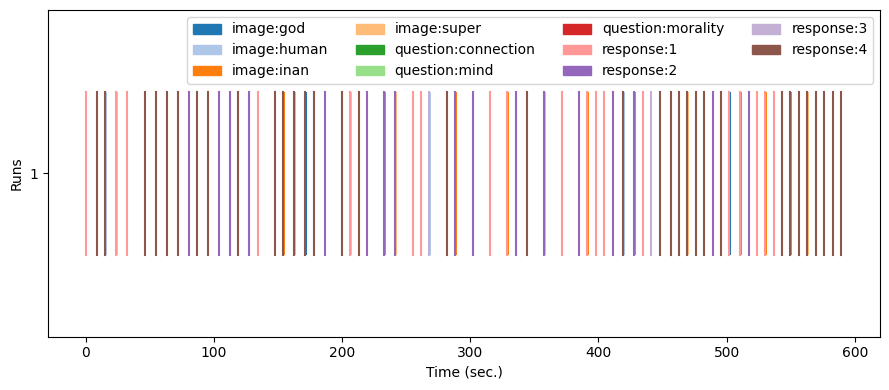

/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:4, response:3, response:2.
  warnings.warn(


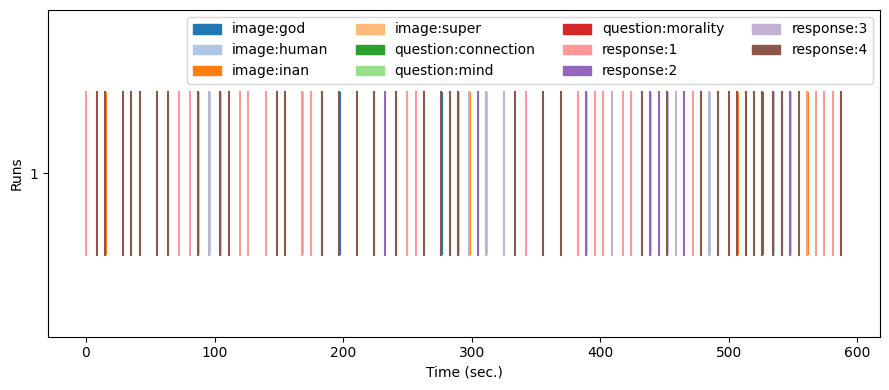

In [36]:
# Visualzie the events for three runs
for run_id, design_matrix in enumerate(design_matrices, start=1):
    ax = axes[run_id - 1]  # Select the appropriate subplot
    plot_event(event_matrices[run_id - 1], figsize=(9, 4))
    plt.show()

In [46]:
# Define the FirstLevelModel with appropriate parameters
fmri_glm = FirstLevelModel(
    t_r=t_r,                      # Repetition time of the fMRI scans
    hrf_model='glover',           # Hemodynamic response function model
    drift_model='cosine',         # Model of low-frequency drifts
    high_pass=0.01,               # High-pass filter cutoff in Hz
    smoothing_fwhm=5.0,           # Spatial smoothing in millimeters
    noise_model='ar1',            # Autoregressive noise model
    signal_scaling=0,             # Scaling the signal (0 means no scaling)
    n_jobs=-1,                     # Number of CPUs to use, -1 for all
    verbose=1                     # Verbosity level (0: no message, 1: progress messages)
)
print("The GLM model has been defined.") 

The GLM model has been defined.


In [47]:
fmri_glm_multirun = fmri_glm.fit(fmri_imgs, design_matrices=design_matrices)

# We can just define the contrast array for one run and assume
# that the design matrix is the same for the other.
# However, if we want to be safe, we should define each contrast separately,
# and provide it as a list.
contrast_id = '+image:god-image:human'
contrast_def = contrasts[contrast_id]

print('Number crunching starts ...')
z_map = fmri_glm_multirun.compute_contrast(
    contrast_def,
    output_type="z_score",
)
print('Number crunching has been completed.')

Computing run 1 out of 3 runs (go take a coffee, a big one)
Computing run 2 out of 3 runs (33 seconds remaining)
Computing run 3 out of 3 runs (15 seconds remaining)

Computation of 3 runs done in 44.26177930831909 seconds.

/tmp/ipykernel_2697493/104174826.py:11: UserWarning: One contrast given, assuming it for all 3 runs
  z_map = fmri_glm_multirun.compute_contrast(


Number crunching starts ...
Number crunching has been completed.


In [48]:
# Define the path to the NIFTI file
subjects_dir = "/project/6019337/databases/religion/bids/preprocessed_23.1.3/"
subject = "sub-45TDGV"
t1_fname = os.path.join(subjects_dir, subject, "ses-1", "anat", "sub-45TDGV_ses-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz")

# Load the NIFTI file as a Niimg-like object
t1_img = image.load_img(t1_fname)

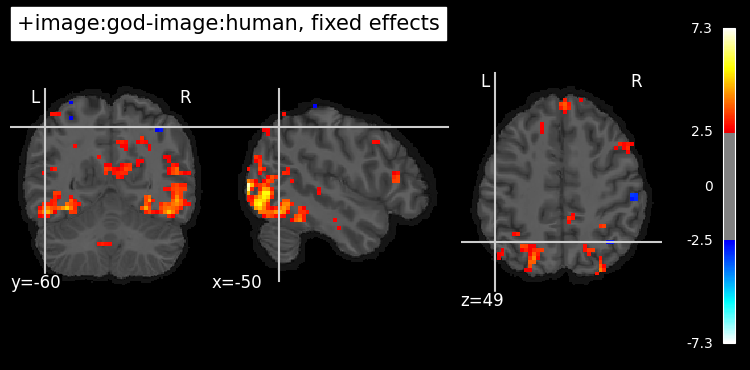

In [51]:
cut_coords = [-50, -60, 49]

plotting.plot_stat_map(
    z_map,
    bg_img=t1_img,
    threshold=2.5,
    cut_coords=cut_coords,
    title=f"{contrast_id}, fixed effects",
)

plotting.show()

In [52]:
type(z_map)

nibabel.nifti1.Nifti1Image

In [55]:
# Construct the output path with the contrast_id
folder_out = "/project/6019337/vvakorin/sdata3/religion/zmaps/"
fname_out = f"zmap_{subject_id}_fixed_{contrast_id}.nii.gz"
zmap_fname_out = os.path.join(folder_out, fname_out)

# Save the z_map image to the specified location
nibabel.save(z_map, zmap_fname_out)